In [1]:
import pandas as pd


In [2]:
# Load trader data
trades_df = pd.read_csv(r"S:\Black Pearl\Language\Projects(github)\anythingAI\historical_data.csv")

# Load fear & greed data
sentiment_df = pd.read_csv(r"S:\Black Pearl\Language\Projects(github)\anythingAI\fear_greed_index.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'S:\\Black Pearl\\Language\\Projects(github)\\anythingAI\\historical_data.csv'

In [ ]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:

sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trades_df.shape

(211224, 16)

In [ ]:
sentiment_df.shape

(2644, 4)

In [ ]:
trades_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [ ]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [ ]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [ ]:
# Convert date column to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Keep only required columns
sentiment_clean = sentiment_df[['date', 'classification']]

sentiment_clean.head()


,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [ ]:
# Convert trade timestamp to datetime
# Convert Timestamp IST safely (handles mixed formats)
trades_df['Timestamp IST'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

# Check if any timestamps failed to parse
trades_df['Timestamp IST'].isna().sum()

# Extract date from timestamp
trades_df['date'] = trades_df['Timestamp IST'].dt.date

# Convert date to datetime for safe merging
trades_df['date'] = pd.to_datetime(trades_df['date'])

# Select important columns and rename them
trades_clean = trades_df[[
    'Account',
    'Coin',
    'Side',
    'Size USD',
    'Closed PnL',
    'date'
]].rename(columns={
    'Size USD': 'size_usd',
    'Closed PnL': 'closed_pnl'
})

trades_clean.head()


,Account,Coin,Side,size_usd,closed_pnl,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7872.16,0.0,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,127.68,0.0,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,1150.63,0.0,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,1142.04,0.0,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,69.75,0.0,2024-12-02


In [ ]:
# Drop rows where timestamp could not be parsed
trades_df = trades_df.dropna(subset=['Timestamp IST'])


In [ ]:
# Convert Timestamp IST safely
trades_df['Timestamp IST'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

# Drop invalid timestamps
trades_df = trades_df.dropna(subset=['Timestamp IST'])

# Extract date
trades_df['date'] = pd.to_datetime(trades_df['Timestamp IST'].dt.date)

# Select relevant columns
trades_clean = trades_df[[
    'Account',
    'Coin',
    'Side',
    'Size USD',
    'Closed PnL',
    'date'
]].rename(columns={
    'Size USD': 'size_usd',
    'Closed PnL': 'closed_pnl'
})

trades_clean.head()


,Account,Coin,Side,size_usd,closed_pnl,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7872.16,0.0,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,127.68,0.0,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,1150.63,0.0,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,1142.04,0.0,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,69.75,0.0,2024-12-02


In [ ]:
sentiment_clean = sentiment_df[['date', 'classification']]
sentiment_clean['date'] = pd.to_datetime(sentiment_clean['date'])

sentiment_clean.head()


C:\Users\sunil\AppData\Local\Temp\ipykernel_14492\3885079444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_clean['date'] = pd.to_datetime(sentiment_clean['date'])


,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [ ]:
print("Trades date range:")
print(trades_clean['date'].min(), "→", trades_clean['date'].max())

print("\nSentiment date range:")
print(sentiment_clean['date'].min(), "→", sentiment_clean['date'].max())


Trades date range:
2023-05-01 00:00:00 → 2025-05-01 00:00:00

Sentiment date range:
2018-02-01 00:00:00 → 2025-05-02 00:00:00


In [ ]:
merged_df = pd.merge(
    trades_clean,
    sentiment_clean,
    on='date',
    how='left'
)


In [ ]:
merged_df.shape


(211224, 7)

In [ ]:
merged_df['classification'].isna().sum()


np.int64(6)

In [ ]:
merged_df['classification'].value_counts()


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [ ]:
merged_df = merged_df.dropna(subset=['classification'])


In [ ]:
merged_df['classification'].isna().sum()
merged_df['classification'].value_counts()


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [ ]:
merged_df.groupby('classification')['closed_pnl'].mean()


classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: closed_pnl, dtype: float64

In [ ]:
merged_df.groupby('classification')['closed_pnl'].median()


classification
Extreme Fear     0.0
Extreme Greed    0.0
Fear             0.0
Greed            0.0
Neutral          0.0
Name: closed_pnl, dtype: float64

In [ ]:
merged_df['is_profitable'] = merged_df['closed_pnl'] > 0

merged_df.groupby('classification')['is_profitable'].mean()


classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: is_profitable, dtype: float64

In [ ]:
merged_df['classification'].value_counts()


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [ ]:
merged_df.groupby('classification')['size_usd'].mean()


classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: size_usd, dtype: float64

In [ ]:
pd.crosstab(
    merged_df['classification'],
    merged_df['Side'],
    normalize='index'
)


Side,BUY,SELL
classification,,
Extreme Fear,0.510981,0.489019
Extreme Greed,0.448590,0.551410
Fear,0.489513,0.510487
Greed,0.488559,0.511441
Neutral,0.503343,0.496657


In [ ]:
fear_pnl = merged_df[merged_df['classification'] == 'Fear']['closed_pnl']
greed_pnl = merged_df[merged_df['classification'] == 'Greed']['closed_pnl']


In [ ]:
fear_pnl.describe()
greed_pnl.describe()


count     50303.000000
mean         42.743559
std        1116.028390
min     -117990.104100
25%           0.000000
50%           0.000000
75%           4.944105
max       74530.523710
Name: closed_pnl, dtype: float64

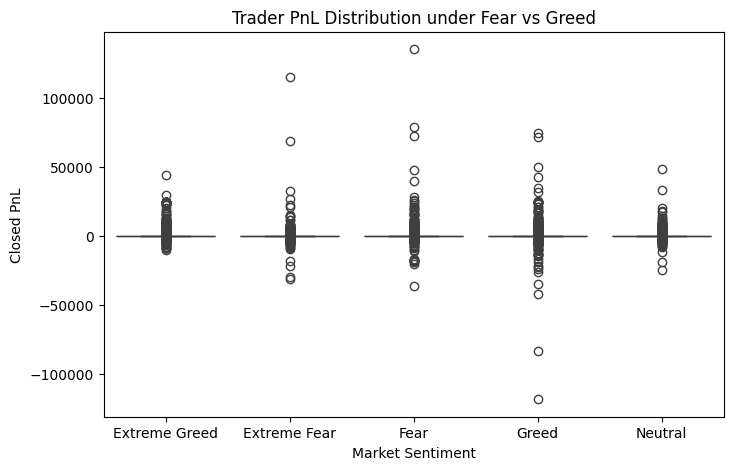

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(
    data=merged_df,
    x='classification',
    y='closed_pnl'
)
plt.title("Trader PnL Distribution under Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


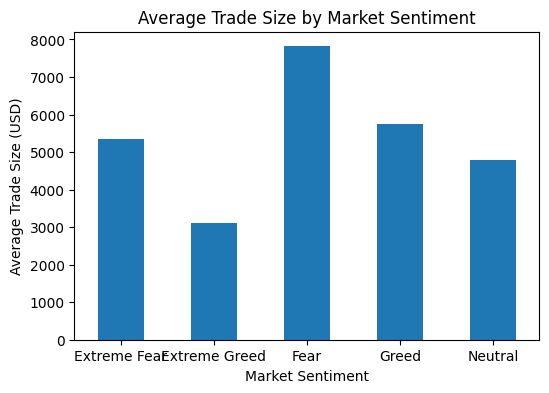

In [ ]:
avg_size = merged_df.groupby('classification')['size_usd'].mean()

avg_size.plot(kind='bar', figsize=(6,4))
plt.title("Average Trade Size by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=0)
plt.show()


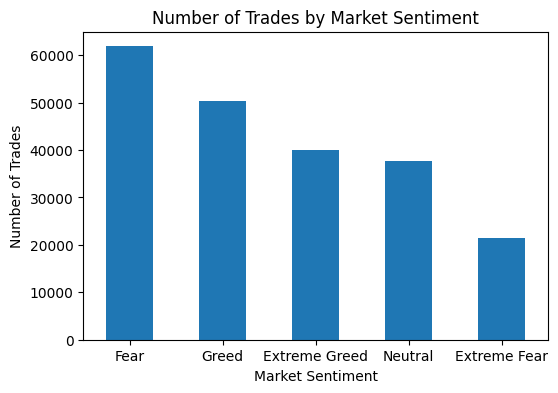

In [ ]:
trade_counts = merged_df['classification'].value_counts()

trade_counts.plot(kind='bar', figsize=(6,4))
plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=0)
plt.show()


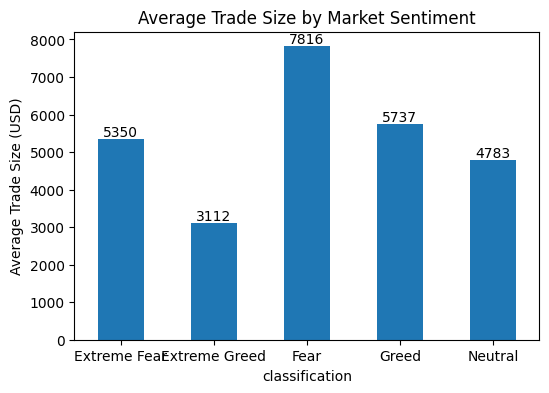

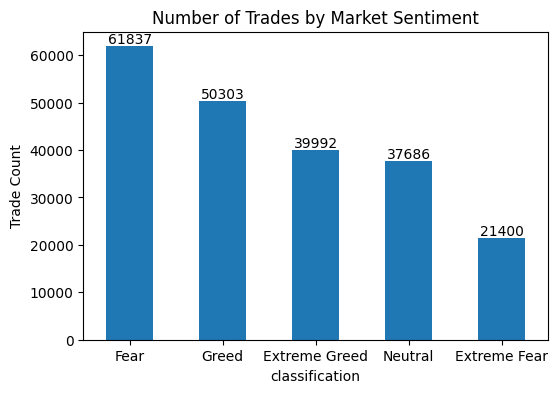

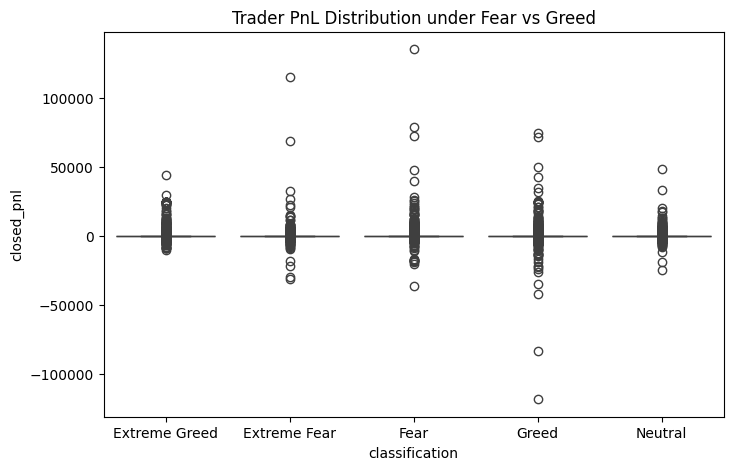

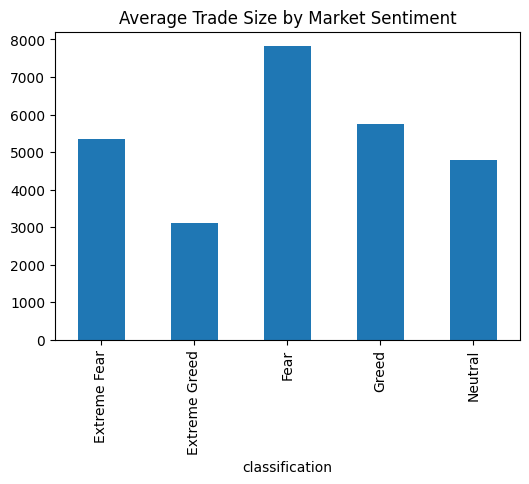

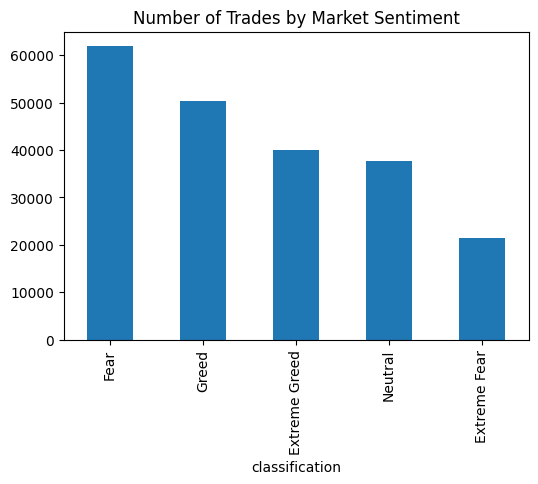

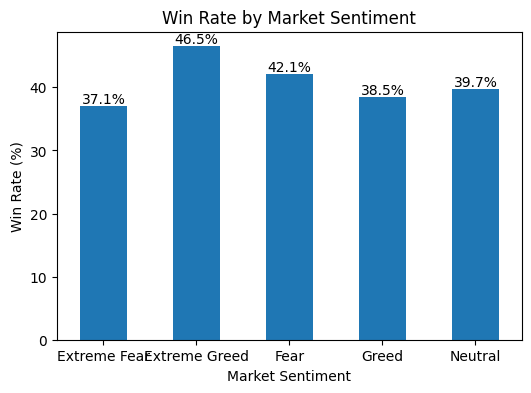

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1. LOAD DATA
# ===============================
trades_df = pd.read_csv(r"S:\Black Pearl\Language\Projects(github)\anythingAI\historical_data.csv")
sentiment_df = pd.read_csv(r"S:\Black Pearl\Language\Projects(github)\anythingAI\fear_greed_index.csv")

# ===============================
# 2. CLEAN SENTIMENT DATA
# ===============================
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_clean = sentiment_df[['date', 'classification']]

# ===============================
# 3. CLEAN TRADER DATA
# ===============================
trades_df['Timestamp IST'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

# Drop invalid timestamps
trades_df = trades_df.dropna(subset=['Timestamp IST'])

# Extract date for joining
trades_df['date'] = pd.to_datetime(trades_df['Timestamp IST'].dt.date)

# Select relevant columns
trades_clean = trades_df[[
    'Account',
    'Coin',
    'Side',
    'Size USD',
    'Closed PnL',
    'date'
]].rename(columns={
    'Size USD': 'size_usd',
    'Closed PnL': 'closed_pnl'
})

# ===============================
# 4. MERGE DATASETS
# ===============================
merged_df = pd.merge(
    trades_clean,
    sentiment_clean,
    on='date',
    how='left'
)

# Drop rows without sentiment
merged_df = merged_df.dropna(subset=['classification'])

# ===============================
# 5. ANALYSIS
# ===============================
# Performance
mean_pnl = merged_df.groupby('classification')['closed_pnl'].mean()
median_pnl = merged_df.groupby('classification')['closed_pnl'].median()

merged_df['is_profitable'] = merged_df['closed_pnl'] > 0
win_rate = merged_df.groupby('classification')['is_profitable'].mean()

# Behavior
trade_counts = merged_df['classification'].value_counts()
avg_trade_size = merged_df.groupby('classification')['size_usd'].mean()
buy_sell_ratio = pd.crosstab(
    merged_df['classification'],
    merged_df['Side'],
    normalize='index'
)
performance_summary = merged_df.groupby('classification').agg(
    avg_pnl=('closed_pnl', 'mean'),
    median_pnl=('closed_pnl', 'median'),
    win_rate=('is_profitable', 'mean')
)

# Convert win rate to percentage
performance_summary['win_rate'] = performance_summary['win_rate'] * 100

performance_summary

behavior_summary = merged_df.groupby('classification').agg(
    trade_count=('closed_pnl', 'count'),
    avg_trade_size_usd=('size_usd', 'mean'),
    median_trade_size_usd=('size_usd', 'median')
)

behavior_summary

buy_sell_ratio = pd.crosstab(
    merged_df['classification'],
    merged_df['Side'],
    normalize='index'
) * 100

buy_sell_ratio

ax = avg_trade_size.plot(kind='bar', figsize=(6,4))
plt.title("Average Trade Size by Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

plt.show()


ax = trade_counts.plot(kind='bar', figsize=(6,4))
plt.title("Number of Trades by Market Sentiment")
plt.ylabel("Trade Count")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

plt.show()

# ===============================
# 6. VISUALIZATION
# ===============================
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='closed_pnl')
plt.title("Trader PnL Distribution under Fear vs Greed")
plt.show()

avg_trade_size.plot(kind='bar', figsize=(6,4))
plt.title("Average Trade Size by Market Sentiment")
plt.show()

trade_counts.plot(kind='bar', figsize=(6,4))
plt.title("Number of Trades by Market Sentiment")
plt.show()
win_rate_plot = merged_df.groupby('classification')['is_profitable'].mean() * 100

ax = win_rate_plot.plot(kind='bar', figsize=(6,4))
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

plt.show()



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1. LOAD DATA
# ===============================
trades_df = pd.read_csv(r"S:\Black Pearl\Language\Projects(github)\anythingAI\historical_data.csv")
sentiment_df = pd.read_csv(r"S:\Black Pearl\Language\Projects(github)\anythingAI\fear_greed_index.csv")

# ===============================
# 2. CLEAN SENTIMENT DATA
# ===============================
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_clean = sentiment_df[['date', 'classification']]

# ===============================
# 3. CLEAN TRADER DATA
# ===============================
trades_df['Timestamp IST'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

# Drop invalid timestamps
trades_df = trades_df.dropna(subset=['Timestamp IST'])

# Extract date for joining
trades_df['date'] = pd.to_datetime(trades_df['Timestamp IST'].dt.date)

# Select relevant columns
trades_clean = trades_df[[
    'Account',
    'Coin',
    'Side',
    'Size USD',
    'Closed PnL',
    'date'
]].rename(columns={
    'Size USD': 'size_usd',
    'Closed PnL': 'closed_pnl'
})

# ===============================
# 4. MERGE DATASETS
# ===============================
merged_df = pd.merge(
    trades_clean,
    sentiment_clean,
    on='date',
    how='left'
)

# Drop rows without sentiment
merged_df = merged_df.dropna(subset=['classification'])

# ===============================
# 5. ANALYSIS (NUMERIC SUMMARIES)
# ===============================
merged_df['is_profitable'] = merged_df['closed_pnl'] > 0

performance_summary = merged_df.groupby('classification').agg(
    avg_pnl=('closed_pnl', 'mean'),
    median_pnl=('closed_pnl', 'median'),
    win_rate_pct=('is_profitable', 'mean')
)
performance_summary['win_rate_pct'] *= 100

behavior_summary = merged_df.groupby('classification').agg(
    trade_count=('closed_pnl', 'count'),
    avg_trade_size_usd=('size_usd', 'mean'),
    median_trade_size_usd=('size_usd', 'median')
)

buy_sell_ratio = pd.crosstab(
    merged_df['classification'],
    merged_df['Side'],
    normalize='index'
) * 100

print("Performance Summary:\n", performance_summary)
print("\nBehavior Summary:\n", behavior_summary)
print("\nBuy vs Sell Ratio (%):\n", buy_sell_ratio)

# ===============================
# 6. VISUALIZATIONS
# ===============================

# --- PnL Distribution ---
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x='classification', y='closed_pnl')
plt.title("Trader PnL Distribution under Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()

# --- Average Trade Size ---
avg_trade_size = merged_df.groupby('classification')['size_usd'].mean()
ax = avg_trade_size.plot(kind='bar', figsize=(6,4))
plt.title("Average Trade Size by Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
plt.show()

# --- Trade Count ---
trade_counts = merged_df['classification'].value_counts()
ax = trade_counts.plot(kind='bar', figsize=(6,4))
plt.title("Number of Trades by Market Sentiment")
plt.ylabel("Trade Count")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
plt.show()

# --- Win Rate ---
win_rate_plot = merged_df.groupby('classification')['is_profitable'].mean() * 100
ax = win_rate_plot.plot(kind='bar', figsize=(6,4))
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'S:\\Black Pearl\\Language\\Projects(github)\\anythingAI\\historical_data.csv'